In [1]:

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


In [2]:
img_width = 150
img_height = 150

train_data_dir = 'C:\\Users\\91901\\Desktop\\1577957291_deeplearningwithkerasandtensorflow\\data\\train'
validation_data_dir = 'C:\\Users\\91901\\Desktop\\1577957291_deeplearningwithkerasandtensorflow\\data\\test'
train_samples = 8
validation_samples = 20
epochs = 5
batch_size = 5

# Check for TensorFlow 
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [17]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# 64 : Input for next layer
# (5,5) convulonational windows size
model.add(Conv2D(32, (5, 5), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Output convert into one dimension layer and will go to Dense layer
model.add(Flatten()) 
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [18]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [19]:
# Data Augmentation is a method of artificially creating a new dataset for training from 
# the existing training dataset to improve the performance of deep learning neural network 
# with the amount of data available. It is a form of regularization which makes our model generalize better 
# than before.

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [20]:
# this is the augmentation configuration we will use for testing:
# only rescaling, avoiding having same training and validation data.
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 40 images belonging to 2 classes.


In [22]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [23]:
img, labels = next(train_generator)

In [24]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

5
0.0


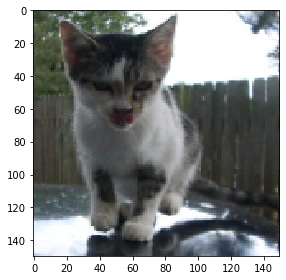

0.0


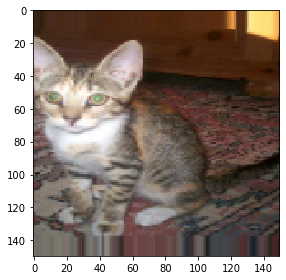

0.0


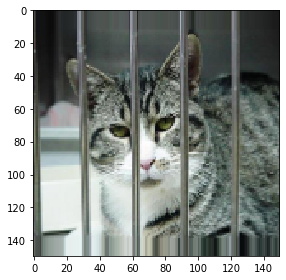

1.0


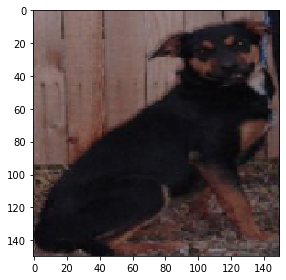

0.0


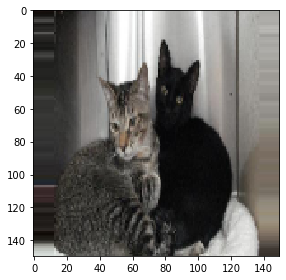

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [26]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20 images belonging to 2 classes.


In [27]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/5
1/1 [==============================] - 1s 642ms/step - loss: 0.6861 - accuracy: 0.6000 - val_loss: 0.7855 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 310ms/step - loss: 0.4848 - accuracy: 0.8000 - val_loss: 1.0011 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 338ms/step - loss: 1.1674 - accuracy: 0.4000 - val_loss: 0.8835 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 375ms/step - loss: 0.6149 - accuracy: 0.8000 - val_loss: 0.7789 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 314ms/step - loss: 0.8556 - accuracy: 0.4000 - val_loss: 0.7107 - val_accuracy: 0.5000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


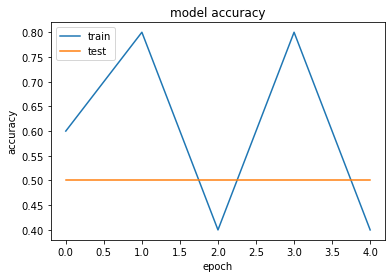

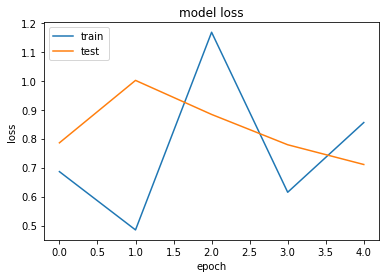

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:

## Now Predict
predict_dir_path='data\\test'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data\\test'

In [ ]:
# predicting images
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)